## calculation uwave spectrum with different elliptical polarizations -- figs for slides

In [1]:
import sys
sys.path.append('../')

from lib.am_utils import *
from lib.mol_functions import *
import lib.consts as c

# from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib widget
# %matplotlib inline

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)
pd.set_option('expand_frame_repr', False)


#### The Hamiltonian
\begin{equation}
H=H_\text{rot}+H_\text{hf}+H_\text{S}+H_\text{Z}
\end{equation}
where
\begin{equation}
H_\text{rot} = B_v\mathbf{N}^2-D_v\mathbf{N}^2\mathbf{N}^2
\end{equation}

\begin{equation}
H_\text{hf} = \sum_{i=1}^2\mathbf{V}_i\cdot\mathbf{Q}_i + \sum_{i=1}^2c_i\mathbf{N}\cdot\mathbf{I}_i + c_3\mathbf{I}_i\cdot\mathbf{T}\cdot\mathbf{I}_2+c_4\mathbf{I}_1\cdot\mathbf{I}_2
\end{equation}

\begin{equation}
H_S = -\mathbf{\mu}\cdot\mathbf{E}
\end{equation}

\begin{equation}
H_Z = -g_r\mu_N\mathbf{N}\cdot\mathbf{B} - \sum_{i=1}^2g_i\mu_N\mathbf{I}_i\cdot\mathbf{B}(1-\sigma_i)
\end{equation}

#### Trap depth dependence

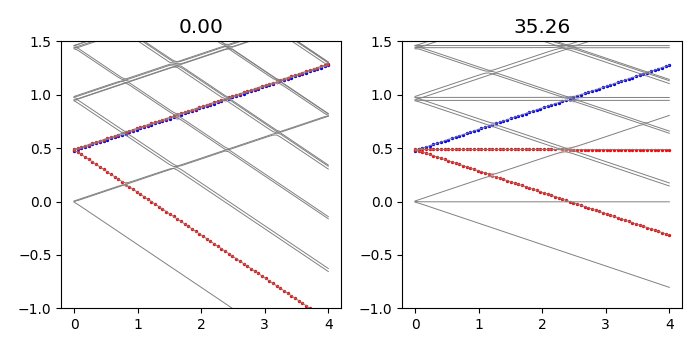

In [5]:
plt.close()
plt.figure(figsize=(7, 3.5))

theta_scan = np.array([0,np.arccos(1/3)/2]) # np.array([0,20/180*np.pi,30/180*np.pi,np.arccos(1/3)/2,40/180*np.pi,np.pi/4])
ax = []
for k in range(len(theta_scan)):
    p = p0.copy()
    p['E_td_00'] = np.linspace(0,4000,70)
    p['B'] = np.linspace(864,864,1)
    theta = theta_scan[k]
    p['trap_pol'] = np.array([[np.cos(theta)],[np.sin(theta)*1j],[0]])
    H_B,b_uc = H_mol(p)

    E0, Ev0 = calc_eig(H_B)

    dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',2.5],['n',0],['m_n',0]])

    E_offset = E0[:,0].reshape(len(E0[:,0]),1)

    ax = plt.subplot(1,len(theta_scan),k+1)
    x = p['E_td_00']/1e3
    ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.7)
    for i,xx in enumerate(x):
        dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
        dm_this = dm_this / np.max(dm_this)
        inds = np.argwhere(np.abs(dm_this) > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset[i])/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
    for i,xx in enumerate(x):
    #     dm_this = dm_val[0][i,:] # sig polarization
        dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
        dd = dd / np.max(dd)
        inds = np.argwhere(dd > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset[i])/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        

    plt.ylim(-1,1.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('{x:.2f}'.format(x=theta/np.pi*180))
    plt.tight_layout()

In [7]:
np.arccos(1/3)/2

0.6154797086703874

#### uwave pathways

In [8]:
p = p0.copy()
p['E_td_00'] = np.linspace(1500,1500,1)
p['B'] = np.linspace(864,864,1)
# p['trap_pol'] = np.array([[np.cos(np.arccos(1/3)/2)],[1j*np.sin(np.arccos(1/3)/2)],[0]])
p['trap_pol'] = np.array([[0],[1],[0]])
H_B,b_uc = H_mol(p)

E0, Ev0 = calc_eig(H_B)

In [9]:
calc_uwave(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',2.5],['n',0],['m_n',0]])

Ev index: 1
     m_i1  m_i2    n  m_n     amps
120   1.5   2.5  0.0  0.0 -0.99982
92    0.5   3.5  0.0  0.0  0.01899
     m_i1  m_i2    n  m_n   mF      sig-        pi      sig+      E [kHz]  rot  v_ind
121   1.5   2.5  1.0 -1.0  3.0  -0.40917  -0.00000   0.40712   489.706400 -1.0     33
123   1.5   2.5  1.0  1.0  5.0   0.40464  -0.00000   0.40769  1390.385681  1.0     39
122   1.5   2.5  1.0  0.0  4.0  -0.00000  -0.57224  -0.00000  1379.165897  0.0     38
89    0.5   2.5  1.0 -1.0  2.0   0.00000  -0.07455   0.00000  1444.324402 -1.0     40
113   1.5   0.5  1.0 -1.0  1.0   0.04230   0.00000   0.03659  1464.074518 -1.0     41
126   1.5   3.5  1.0  0.0  5.0  -0.01351   0.00000   0.00098   907.756654  0.0     35
118   1.5   1.5  1.0  0.0  3.0  -0.01069  -0.00000  -0.00529  1854.326156  0.0     43
127   1.5   3.5  1.0  1.0  6.0   0.00000   0.01123  -0.00000   900.806969  1.0     34
117   1.5   1.5  1.0 -1.0  2.0  -0.00000   0.00974   0.00000   977.854499 -1.0     37
119   1.5   1.5  1.0  1

### plot with experimental data points

mn= 0 or 1, trap_dpeth (MHz)= [4.8559172 5.3389786 5.82204 ]  acstark(kHz)=[ 907.82 1012.82 1086.82]

mn=-1, trap_depth(MHz)= [2.92367161 3.40673301 5.3389786 ] acstark(kHz)=[-1223.18 -1413.18 -2223.18]

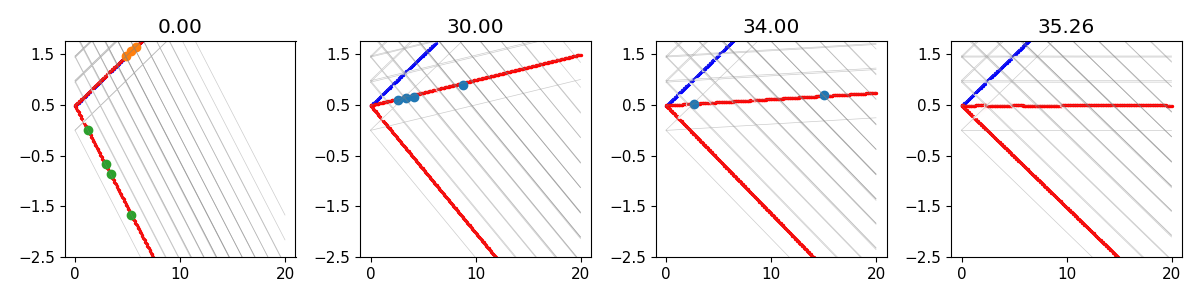

In [17]:
plt.close()
plt.figure(figsize=(12, 3))

theta_scan = np.array([0,30/180*np.pi,34/180*np.pi,np.arccos(1/3)/2]) # np.array([0,20/180*np.pi,30/180*np.pi,np.arccos(1/3)/2,40/180*np.pi,np.pi/4])
ax = []
for k in range(len(theta_scan)):
    p = p0.copy()
    p['E_td_00'] = np.linspace(0,20000,300)
    p['B'] = np.linspace(864,864,1)
    theta = theta_scan[k]
    p['trap_pol'] = np.array([[np.cos(theta)],[np.sin(theta)*1j],[0]])
    H_B,b_uc = H_mol(p)

    E0, Ev0 = calc_eig(H_B)

    dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',2.5],['n',0],['m_n',0]])

    E_offset = E0[:,0].reshape(len(E0[:,0]),1)

    ax = plt.subplot(1,len(theta_scan),k+1)
    x = p['E_td_00']/1e3
    ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
    for i,xx in enumerate(x):
        dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
        dm_this = dm_this / np.max(dm_this)
        inds = np.argwhere(np.abs(dm_this) > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset[i])/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
    for i,xx in enumerate(x):
    #     dm_this = dm_val[0][i,:] # sig polarization
        dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
        dd = dd / np.max(dd)
        inds = np.argwhere(dd > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset[i])/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        

    plt.ylim(-2.25,1.75)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.title('{x:.2f}'.format(x=theta/np.pi*180))
    
    if k == 0:
        xs1 = np.array([4.8559172, 5.3389786, 5.82204 ])
        ys1 = np.array([ 907.82, 1012.82, 1086.82])/1e3 +0.55
        ax.scatter(xs1,ys1,color = 'C1')
        xs2 = np.array([1.2329567130022423, 2.92367161, 3.40673301, 5.3389786])
        ys2 = np.array([-548.18,-1223.18, -1413.18, -2223.18])/1e3+0.55
        ax.scatter(xs2,ys2,color='C2')
    elif k == 1:
#         ax.scatter(np.array([2.38812397, 3.10278367, 3.57922347]),np.array([70.84,70.62,70.5])+0.1-71.35)
        ax.scatter(np.array([2.62634387, 3.40055855, 4.17477322, 8.82006127]),np.array([71.49,71.53,71.562,71.8])+0.55-71.45)        
#         ax.scatter(np.array([2.923671,1.71601811175]),np.array([70.55-71.373,70.9-71.373])+0.1 )
    elif k == 2:
#         ax.scatter(np.array([2.38812397, 3.10278367, 3.57922347]),np.array([70.84,70.62,70.5])+0.1-71.35)
        ax.scatter(np.array([2.626343873890443, 15.013778672406767]),np.array([71.42,71.59])+0.55-71.45)        
#         ax.scatter(np.array([2.923671,1.71601811175]),np.array([70.55-71.373,70.9-71.373])+0.1 )
#     elif k == 2:
#         plt.axvline(x = 3.10278367)
#         plt.axvline(x = 4.293883173690718)
#     elif k == 1:
#         ax.scatter(np.array([2.2781763277782976,5.026867481295232]),np.array([71.45,71.57])-71.373+0.1)
    plt.yticks(np.arange(-2.5,2.5,1))
    plt.tight_layout()

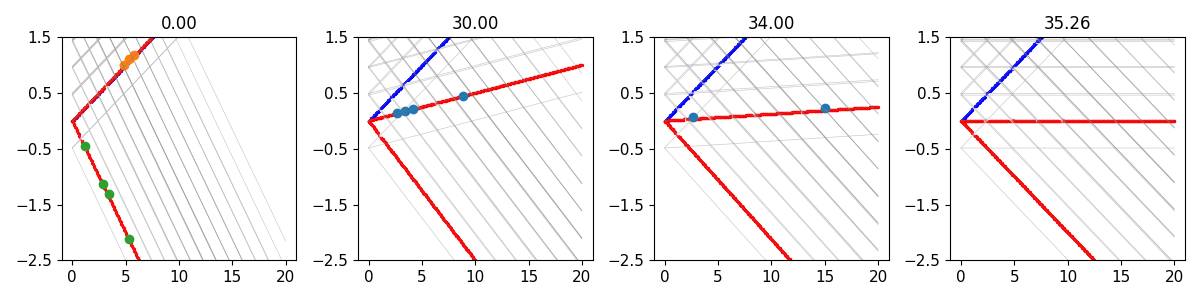

In [8]:
# plt.show()
# plt.savefig('ellipticity.pdf')

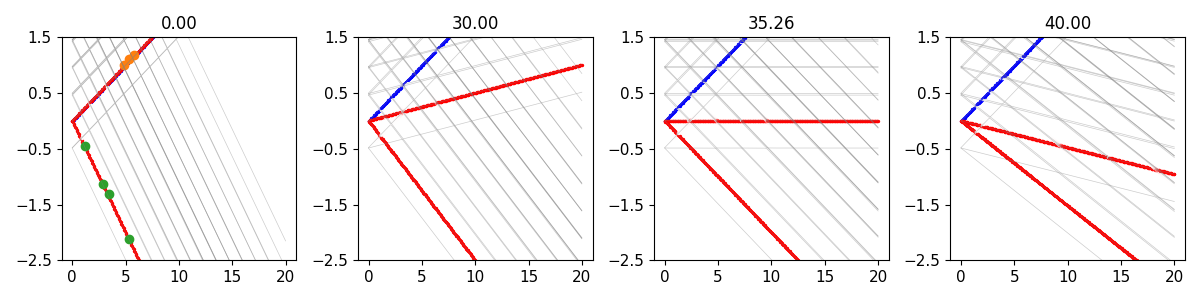

In [73]:
plt.close()
plt.figure(figsize=(12, 3))

theta_scan = np.array([0,30/180*np.pi,np.arccos(1/3)/2,40/180*np.pi]) # np.array([0,20/180*np.pi,30/180*np.pi,np.arccos(1/3)/2,40/180*np.pi,np.pi/4])
ax = []
for k in range(len(theta_scan)):
    p = p0.copy()
    p['E_td_00'] = np.linspace(0,20000,300)
    p['B'] = np.linspace(864,864,1)
    theta = theta_scan[k]
    p['trap_pol'] = np.array([[np.cos(theta)],[np.sin(theta)*1j],[0]])
    H_B,b_uc = H_mol(p)

    E0, Ev0 = calc_eig(H_B)

    dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',2.5],['n',0],['m_n',0]])

    E_offset = E0[0,1]

    ax = plt.subplot(1,len(theta_scan),k+1)
    x = p['E_td_00']/1e3
    ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
    for i,xx in enumerate(x):
        dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
        dm_this = dm_this / np.max(dm_this)
        inds = np.argwhere(np.abs(dm_this) > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
    for i,xx in enumerate(x):
    #     dm_this = dm_val[0][i,:] # sig polarization
        dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
        dd = dd / np.max(dd)
        inds = np.argwhere(dd > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        

    plt.ylim(-2.5,1.5)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.title('{x:.2f}'.format(x=theta/np.pi*180))
    
    if k == 0:
        xs1 = np.array([4.8559172, 5.3389786, 5.82204 ])
        ys1 = np.array([ 907.82, 1012.82, 1086.82])/1e3 +0.1
        ax.scatter(xs1,ys1,color = 'C1')
        xs2 = np.array([1.2329567130022423, 2.92367161, 3.40673301, 5.3389786])
        ys2 = np.array([-548.18,-1223.18, -1413.18, -2223.18])/1e3+0.1
        ax.scatter(xs2,ys2,color='C2')
#     elif k == 1:
# #         ax.scatter(np.array([2.38812397, 3.10278367, 3.57922347]),np.array([70.84,70.62,70.5])+0.1-71.35)
#         ax.scatter(np.array([2.62634387, 3.40055855, 4.17477322, 8.82006127]),np.array([71.49,71.53,71.562,71.8])+0.1-71.45)        
# #         ax.scatter(np.array([2.923671,1.71601811175]),np.array([70.55-71.373,70.9-71.373])+0.1 )
#     elif k == 2:
# #         ax.scatter(np.array([2.38812397, 3.10278367, 3.57922347]),np.array([70.84,70.62,70.5])+0.1-71.35)
#         ax.scatter(np.array([2.626343873890443, 15.013778672406767]),np.array([71.42,71.59])+0.1-71.45)        
# #         ax.scatter(np.array([2.923671,1.71601811175]),np.array([70.55-71.373,70.9-71.373])+0.1 )
# #     elif k == 2:
# #         plt.axvline(x = 3.10278367)
# #         plt.axvline(x = 4.293883173690718)
# #     elif k == 1:
# #         ax.scatter(np.array([2.2781763277782976,5.026867481295232]),np.array([71.45,71.57])-71.373+0.1)
    plt.yticks(np.arange(-2.5,2.5,1))
    plt.tight_layout()

In [48]:
np.arange(-2.5,2.5,1)

array([-2.5, -1.5, -0.5,  0.5,  1.5])

## B field dependence

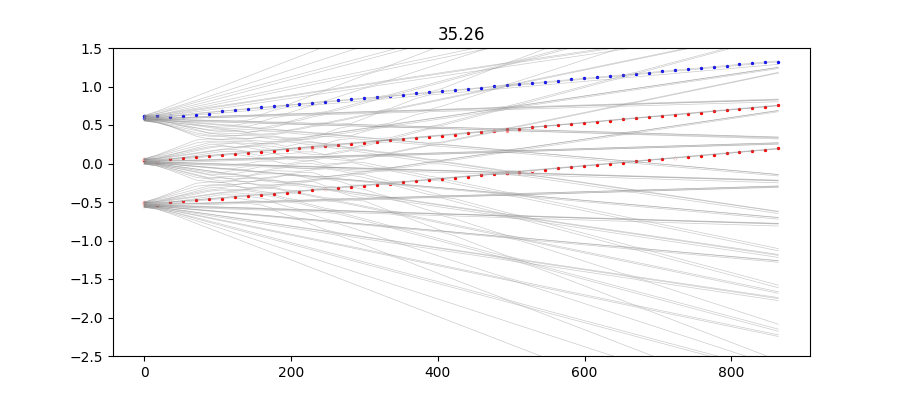

In [33]:
plt.close()
plt.figure(figsize=(9, 4))

theta_scan = np.array([np.arccos(1/3)/2]) # np.array([0,20/180*np.pi,30/180*np.pi,np.arccos(1/3)/2,40/180*np.pi,np.pi/4])
ax = []
for k in range(len(theta_scan)):
    p = p0.copy()
    p['E_td_00'] = np.linspace(2800,2800,1)
    p['B'] = np.linspace(0,864,50)
    theta = theta_scan[k]
    p['trap_pol'] = np.array([[np.cos(theta)],[np.sin(theta)*1j],[0]])
    H_B,b_uc = H_mol(p)

    E0, Ev0 = calc_eig(H_B)

    dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',2.5],['n',0],['m_n',0]])

    E_offset = E0[0,1]

    ax = plt.subplot(1,len(theta_scan),k+1)
    x = p['B'] # p['E_td_00']/1e3
    ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
    for i,xx in enumerate(x):
        dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
        dm_this = dm_this / np.max(dm_this)
        inds = np.argwhere(np.abs(dm_this) > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
    for i,xx in enumerate(x):
    #     dm_this = dm_val[0][i,:] # sig polarization
        dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
        dd = dd / np.max(dd)
        inds = np.argwhere(dd > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        

    plt.ylim(-2.5,1.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('{x:.2f}'.format(x=theta/np.pi*180))

### b field angle dependence

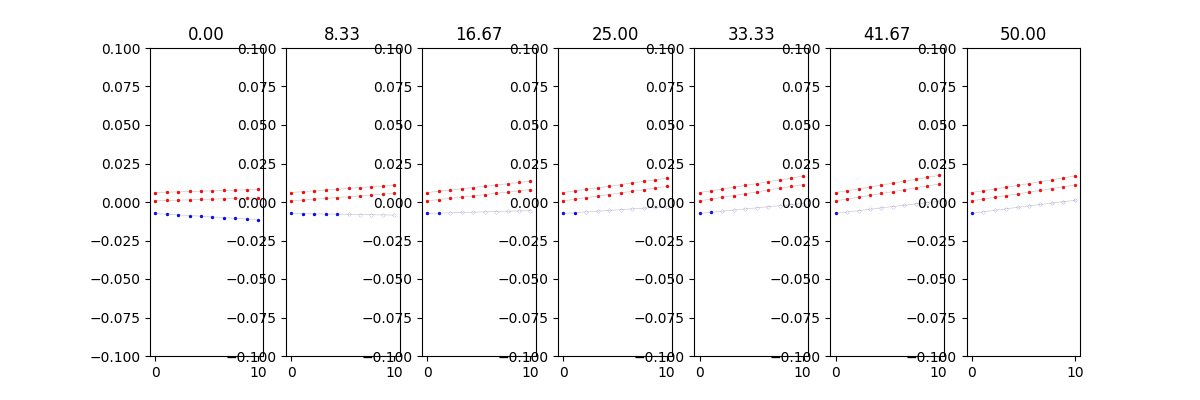

In [71]:
plt.close()
plt.figure(figsize=(12, 4))

theta_scan = np.linspace(0,50,7)/180*np.pi # np.array([np.arccos(1/3)/2]) # np.array([0,20/180*np.pi,30/180*np.pi,np.arccos(1/3)/2,40/180*np.pi,np.pi/4])
ax = []
for k in range(len(theta_scan)):
    p = p0.copy()
    p['E_td_00'] = np.linspace(0,10,10)
    p['B'] = np.linspace(864,864,1)
    theta = theta_scan[k]
    p['trap_pol'] = np.array([[0],[np.sin(theta)],[np.cos(theta)]])
    H_B,b_uc = H_mol(p)

    E0, Ev0 = calc_eig(H_B)

    dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',2.5],['n',0],['m_n',0]])

    E_offset = E0[0,1]

    ax = plt.subplot(1,len(theta_scan),k+1)
    x = p['E_td_00'] # p['E_td_00']/1e3
    ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
    for i,xx in enumerate(x):
        dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
        dm_this = dm_this / np.max(dm_this)
        inds = np.argwhere(np.abs(dm_this) > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
    for i,xx in enumerate(x):
    #     dm_this = dm_val[0][i,:] # sig polarization
        dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
        dd = dd / np.max(dd)
        inds = np.argwhere(dd > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        

    plt.ylim(-.1,.1)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('{x:.2f}'.format(x=theta/np.pi*180))
    
#     if k == 0:
#         xs1 = np.array([4.8559172, 5.3389786, 5.82204 ])
#         ys1 = np.array([ 907.82, 1012.82, 1086.82])/1e3 +0.1
#         ax.scatter(xs1,ys1,color = 'C1')
#         xs2 = np.array([1.2329567130022423, 2.92367161, 3.40673301, 5.3389786])
#         ys2 = np.array([-548.18,-1223.18, -1413.18, -2223.18])/1e3+0.1
#         ax.scatter(xs2,ys2,color='C2')
# #     elif k == 1:
# #         ax.scatter(np.array([2.38812397, 3.10278367, 3.57922347]),np.array([70.84,70.62,70.5])+0.1-71.52)
# #         ax.scatter(np.array([2.38812397, 3.10278367]),np.array([71.513,71.58])+0.1-71.52)        
# # #         ax.scatter(np.array([2.923671,1.71601811175]),np.array([70.55-71.373,70.9-71.373])+0.1 )
# #     elif k == 2:
# #         plt.axvline(x = 3.10278367)
# #         plt.axvline(x = 4.293883173690718)
#     elif k == 1:
#         ax.scatter(np.array([2.2781763277782976,5.026867481295232]),np.array([71.45,71.57]-71.373+0.1))